<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h2>Linear Regression</h2>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

watermark  1.8.1
numpy      1.16.2
matplotlib 3.1.0
Tue Sep 24 2019 2019-09-24T09:28:48-04:00

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 46e8ada9ae78bc5ab280631b85d64d9ea1891da7


In [3]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [4]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

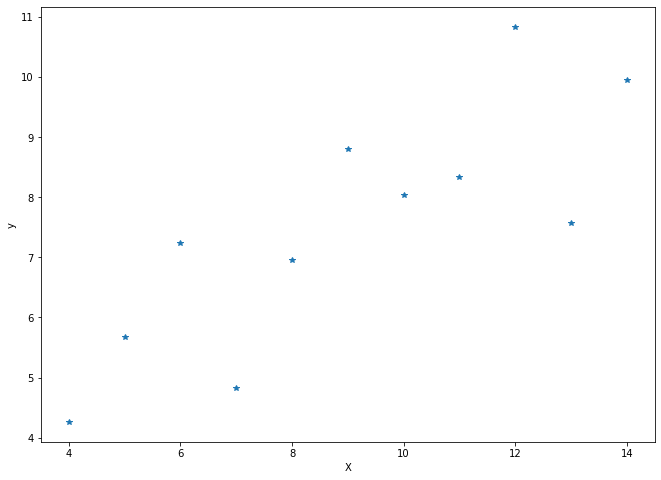

In [9]:
plt.plot(X, y, '*')
plt.xlabel('X')
plt.ylabel('y')
plt.gcf().set_size_inches(11, 8)

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 1.0156121187233378 0.000850294716994604 [0.33867803 0.76362272]
200 0.9392871281862785 0.0006839027618601445 [0.61324329 0.7364354 ]
300 0.8778979759499936 0.0005500716143855833 [0.85948297 0.71205287]
400 0.8285219067782602 0.0004424295350546892 [1.08031928 0.69018576]
500 0.788808111782883 0.0003558516534383216 [1.27837296 0.67057458]
600 0.7568658057348 0.00028621597163347445 [1.45599438 0.6529866 ]
700 0.7311742062342188 0.00023020711475285616 [1.61529145 0.63721308]
800 0.7105101288221294 0.00018515848497269172 [1.7581546  0.62306684]
900 0.6938897508155676 0.0001489253040438676 [1.88627924 0.61038   ]
1000 0.6805217712260517 0.00011978249977417921 [2.00118588 0.599002  ]
1100 0.669769736691388 9.634257485158226e-05 [2.10423814 0.58879781]
1200 0.6611217397476118 7.748954769304373e-05 [2.196659   0.57964635]
1300 0.6541660467670455 6.232582024046085e-05 [2.27954523 0.57143899]
1400 0.6485714952015851 5.012944305782252e-05 [2.35388049 0.56407835]
1500 0.6440717268383123 4.03197

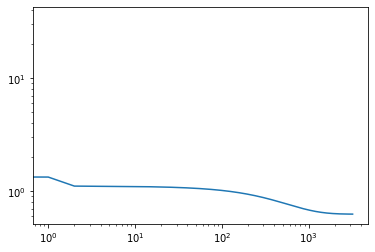

In [16]:
plt.loglog(Js)

In [17]:
weights.flatten()

array([2.90885967, 0.50912458])

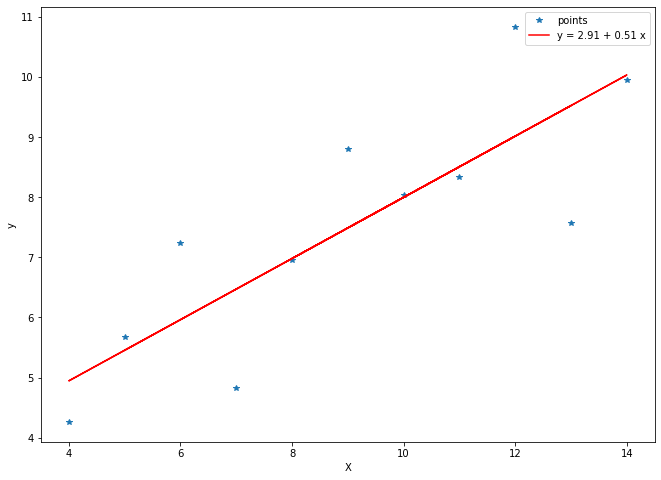

In [18]:
plt.plot(X.T[1], y, '*', label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), 'r-', label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().set_size_inches(11, 8)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>